In [1]:
#Import library
import numpy as np
import pandas as pd
import seaborn as sb

import time
from datetime import datetime, date

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
""" """

' '

In [3]:
cl = pd.read_csv('./calendar.csv')
lt = pd.read_csv('./listings.csv')
rv = pd.read_csv('./reviews.csv')

In [4]:
cl.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [5]:
lt.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [6]:
rv.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [7]:
lt.shape

(3818, 92)

In [8]:
cl.shape

(1393570, 4)

In [9]:
rv.shape

(84849, 6)

In [10]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [11]:
lt.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [12]:
lt.describe(include = 'object')

,listing_url,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,...,has_availability,calendar_last_scraped,first_review,last_review,requires_license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
count,3818,3818,3818,3641,3249,3818,3818,2786,2212,2884,...,3818,3818,3191,3191,3818,3818,3818,3818,3818,3818
unique,3818,1,3792,3478,3119,3742,1,2506,1999,2574,...,1,1,984,321,1,1,2,3,2,2
top,https://www.airbnb.com/rooms/241032,2016-01-04,Capitol Hill Apartment,This is a modern fully-furnished studio apartm...,"*Note: This fall, there will be major renovati...",Our space is a mix of a hostel and a home. We ...,none,Wallingford is a mostly-residential neighborho...,All of our rentals are fully licensed and regu...,Convenient public transportation. The location...,...,t,2016-01-04,2015-09-21,2016-01-02,f,WASHINGTON,f,strict,f,f
freq,1,3818,3,15,14,10,3818,17,39,32,...,3818,3818,25,94,3818,3818,3227,1417,3497,3443


In [13]:
lt.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [14]:
set(lt.columns[lt.isnull().mean() == 0])

{'accommodates',
 'amenities',
 'availability_30',
 'availability_365',
 'availability_60',
 'availability_90',
 'bed_type',
 'calculated_host_listings_count',
 'calendar_last_scraped',
 'calendar_updated',
 'cancellation_policy',
 'city',
 'country',
 'country_code',
 'description',
 'experiences_offered',
 'extra_people',
 'guests_included',
 'has_availability',
 'host_id',
 'host_url',
 'host_verifications',
 'id',
 'instant_bookable',
 'is_location_exact',
 'jurisdiction_names',
 'last_scraped',
 'latitude',
 'listing_url',
 'longitude',
 'market',
 'maximum_nights',
 'minimum_nights',
 'name',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'number_of_reviews',
 'picture_url',
 'price',
 'require_guest_phone_verification',
 'require_guest_profile_picture',
 'requires_license',
 'room_type',
 'scrape_id',
 'smart_location',
 'state',
 'street'}

In [15]:
set(lt.columns[lt.isnull().mean() > 0.8])

{'license', 'square_feet'}

In [16]:
set(lt.columns[lt.isnull().mean() > 0.5])

{'license', 'monthly_price', 'security_deposit', 'square_feet'}

In [17]:
sum(lt.duplicated())

0

In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,5)

Text(0.5, 0, 'Neighbour cities')

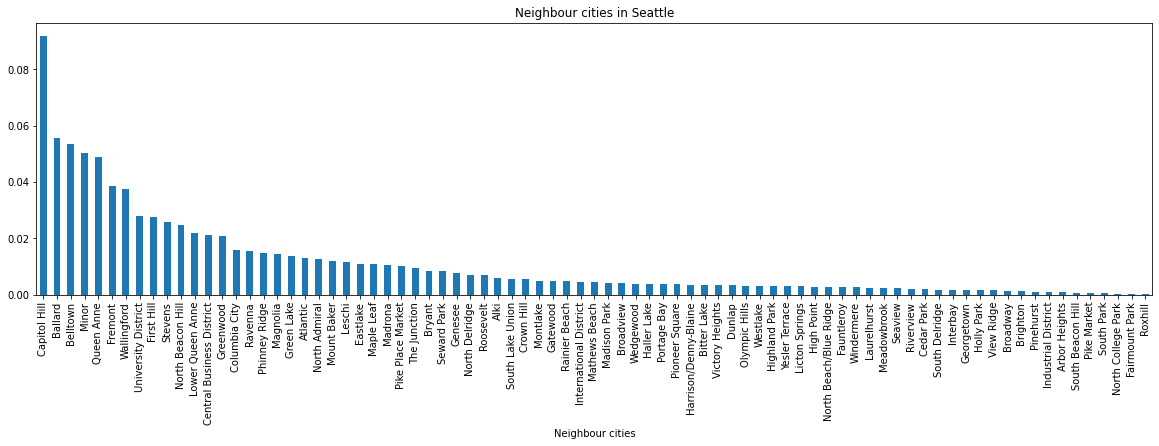

In [19]:
neighbour = lt.neighbourhood.value_counts()
(neighbour / lt.shape[0]).plot(kind = 'bar')
plt.title('Neighbour cities in Seattle')
plt.xlabel('Neighbour cities')

Text(0.5, 0, 'Room type')

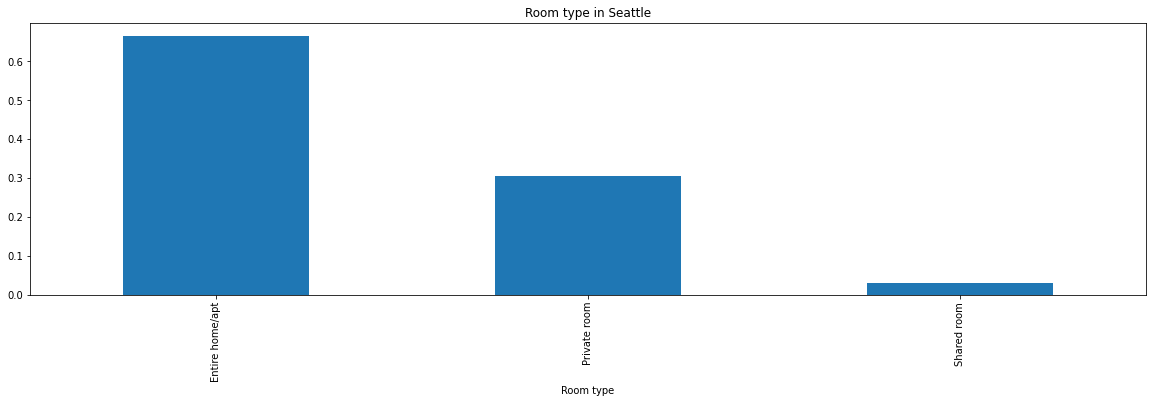

In [20]:
room = lt.room_type.value_counts()
(room / lt.shape[0]).plot(kind = 'bar')
plt.title('Room type in Seattle')
plt.xlabel('Room type')

Text(0.5, 0, 'City')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


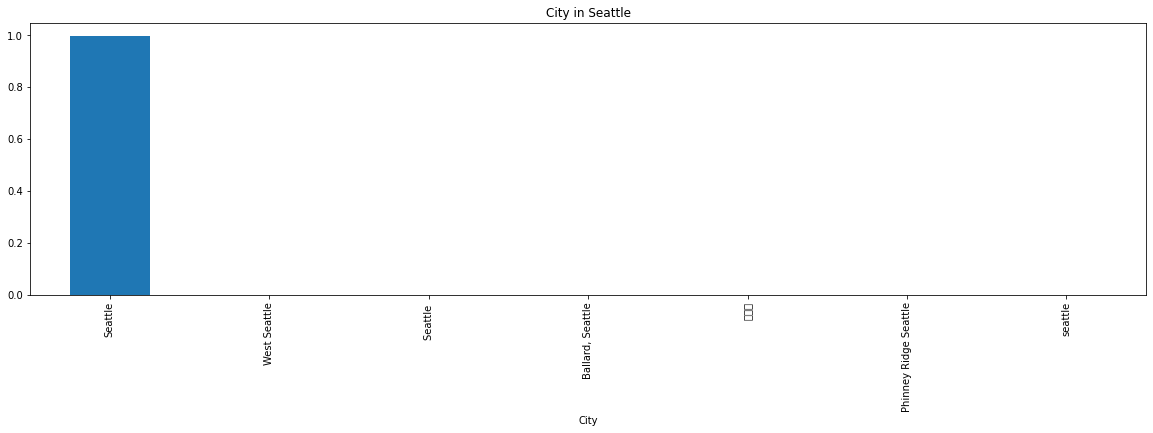

In [21]:
city = lt.city.value_counts()
(city / lt.shape[0]).plot(kind = 'bar')
plt.title('City in Seattle')
plt.xlabel('City')

In [22]:
lt.city.value_counts()

Seattle                  3810
West Seattle                2
Seattle                     2
Ballard, Seattle            1
西雅图                         1
Phinney Ridge Seattle       1
seattle                     1
Name: city, dtype: int64

In [23]:
lt[lt["square_feet"].isnull() == False]["square_feet"]

96       400.0
103      485.0
163      800.0
182      450.0
196        1.0
         ...  
3649     340.0
3652     350.0
3654     250.0
3776     660.0
3810    1200.0
Name: square_feet, Length: 97, dtype: float64

In [24]:
lt[lt["monthly_price"].isnull() == False]["monthly_price"]

1       $3,000.00
3       $2,300.00
8       $1,700.00
9       $3,000.00
11      $2,000.00
          ...    
3802    $5,400.00
3807    $1,800.00
3809    $2,200.00
3810    $5,500.00
3812    $2,200.00
Name: monthly_price, Length: 1517, dtype: object

In [25]:
lt.price

0        $85.00
1       $150.00
2       $975.00
3       $100.00
4       $450.00
         ...   
3813    $359.00
3814     $79.00
3815     $93.00
3816     $99.00
3817     $87.00
Name: price, Length: 3818, dtype: object

In [26]:
lt.monthly_price

0             NaN
1       $3,000.00
2             NaN
3       $2,300.00
4             NaN
          ...    
3813          NaN
3814          NaN
3815          NaN
3816          NaN
3817          NaN
Name: monthly_price, Length: 3818, dtype: object

In [27]:
listing = ['id', 'host_id','scrape_id', 'last_scraped', 'name', 'summary', 'description', 
           'neighborhood_overview', 'transit', 'instant_bookable',
           'thumbnail_url', 'listing_url', 'host_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_location', 
           'host_about', 'host_response_time', 'host_acceptance_rate', 'calendar_last_scraped',
           'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count',
           'street', 'state', 'market', 'smart_location',
           'country_code', 'country', 'first_review', 'last_review', 'experiences_offered', 'host_has_profile_pic', 'space',
           'host_verifications', 'host_identity_verified', 'require_guest_profile_picture', 'requires_license', 'notes']

lt.drop(listing, axis = 1, inplace = True)

In [28]:
lt

,host_name,host_since,host_response_rate,host_is_superhost,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,latitude,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,jurisdiction_names,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Maija,2011-08-11,96%,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.636289,...,10.0,10.0,9.0,10.0,NaN,WASHINGTON,moderate,f,2,4.07
1,Andrea,2013-02-21,98%,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.639123,...,10.0,10.0,10.0,10.0,NaN,WASHINGTON,strict,t,6,1.48
2,Jill,2014-06-12,67%,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.629724,...,10.0,10.0,10.0,10.0,NaN,WASHINGTON,strict,f,2,1.15
3,Emily,2013-11-06,NaN,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.638473,...,NaN,NaN,NaN,NaN,NaN,WASHINGTON,flexible,f,1,NaN
4,Emily,2011-11-29,100%,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.632918,...,10.0,10.0,9.0,9.0,NaN,WASHINGTON,strict,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Bo,2015-04-13,99%,f,Fremont,Fremont,Other neighborhoods,Seattle,98107,47.664295,...,4.0,8.0,10.0,8.0,NaN,WASHINGTON,strict,f,8,0.30
3814,Glen,2015-10-14,100%,f,Portage Bay,Portage Bay,Capitol Hill,Seattle,98102,47.649552,...,10.0,10.0,10.0,10.0,NaN,WASHINGTON,moderate,f,1,2.00
3815,Virginia,2015-12-30,NaN,f,NaN,Rainier Beach,Rainier Valley,Seattle,98178,47.508453,...,NaN,NaN,NaN,NaN,NaN,WASHINGTON,moderate,f,1,NaN
3816,Karen,2015-01-03,100%,f,NaN,Madison Park,Capitol Hill,Seattle,98112,47.632335,...,NaN,NaN,NaN,NaN,NaN,WASHINGTON,moderate,f,1,NaN


In [29]:
def Converter(column):
    try:
        
        if '$' in column:
            column = column.replace('$', '')
            return float(str(column))
    except:
        return column
    

lt['cleaning_fee'] = lt['cleaning_fee'].apply(lambda ele: Converter(ele))
lt['extra_people'] = lt['extra_people'].apply(lambda ele: Converter(ele))
lt['price'] = lt['price'].apply(lambda ele: Converter(ele))

In [30]:
lt['price'] = lt['price'].apply(lambda ele: Converter(ele))

In [31]:
lt.price

0        85.0
1       150.0
2       975.0
3       100.0
4       450.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3818, dtype: float64

In [32]:
lt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 50 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   host_name                         3816 non-null   object 
 1   host_since                        3816 non-null   object 
 2   host_response_rate                3295 non-null   object 
 3   host_is_superhost                 3816 non-null   object 
 4   neighbourhood                     3402 non-null   object 
 5   neighbourhood_cleansed            3818 non-null   object 
 6   neighbourhood_group_cleansed      3818 non-null   object 
 7   city                              3818 non-null   object 
 8   zipcode                           3811 non-null   object 
 9   latitude                          3818 non-null   float64
 10  longitude                         3818 non-null   float64
 11  is_location_exact                 3818 non-null   object 
 12  proper

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


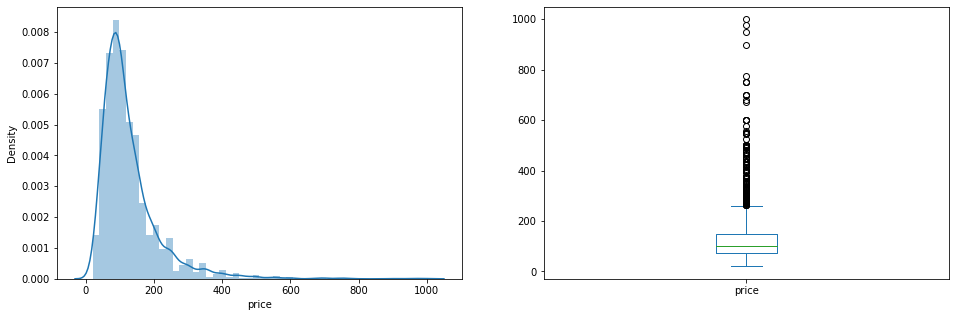

In [33]:
plt.subplot(121)
sb.distplot(lt["price"]);

plt.subplot(122)
lt["price"].plot.box(figsize=(16,5))

plt.show()

In [34]:
lt.price.describe()

count    3817.000000
mean      127.747708
std        89.150860
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max       999.000000
Name: price, dtype: float64

In [35]:
lists = ['review_scores_rating','review_scores_accuracy', 'review_scores_cleanliness', 
         'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 
         'review_scores_value', 'reviews_per_month']

for e in lists:
    lt[e].fillna(lt[e].mean(), axis = 0, inplace = True)

In [36]:
lt.cleaning_fee

0         NaN
1        40.0
2       300.0
3         NaN
4       125.0
        ...  
3813    230.0
3814     50.0
3815     35.0
3816     45.0
3817      NaN
Name: cleaning_fee, Length: 3818, dtype: float64

In [37]:
lt["cleaning_fee"].fillna(lt["cleaning_fee"].mean(), axis = 0, inplace = True)

In [38]:
lt.cleaning_fee

0        61.710904
1        40.000000
2       300.000000
3        61.710904
4       125.000000
           ...    
3813    230.000000
3814     50.000000
3815     35.000000
3816     45.000000
3817     61.710904
Name: cleaning_fee, Length: 3818, dtype: float64

In [39]:
lt["host_response_rate"]

0        96%
1        98%
2        67%
3        NaN
4       100%
        ... 
3813     99%
3814    100%
3815     NaN
3816    100%
3817    100%
Name: host_response_rate, Length: 3818, dtype: object

In [40]:
def Converter2(column):
    try:
        
        if '%' in column:
            column = column.replace('%', '')
            return float(str(column))/100
    except:
        return column

lt['host_response_rate'] = lt['host_response_rate'].apply(lambda ele: Converter2(ele))

In [41]:
lt["host_response_rate"].fillna(lt["host_response_rate"].mean(), axis = 0, inplace = True)

In [42]:
lt.neighbourhood = lt.neighbourhood.fillna('Unknown')
lt.city = lt.city.fillna('Unknown')
lt.property_type = lt.property_type.fillna('Unknown')

In [43]:
lt.price = lt.price.fillna(0)

In [44]:
lists = ['bedrooms', 'bathrooms', 'beds']
for e in lists:
    lt[e].fillna(lt[e].median(), axis = 0, inplace = True)

In [45]:
del lt["license"]

In [46]:
lt_new = lt[lt["price"] <= 500]

In [47]:
lt_new = lt_new[lt_new["price"] != 0]

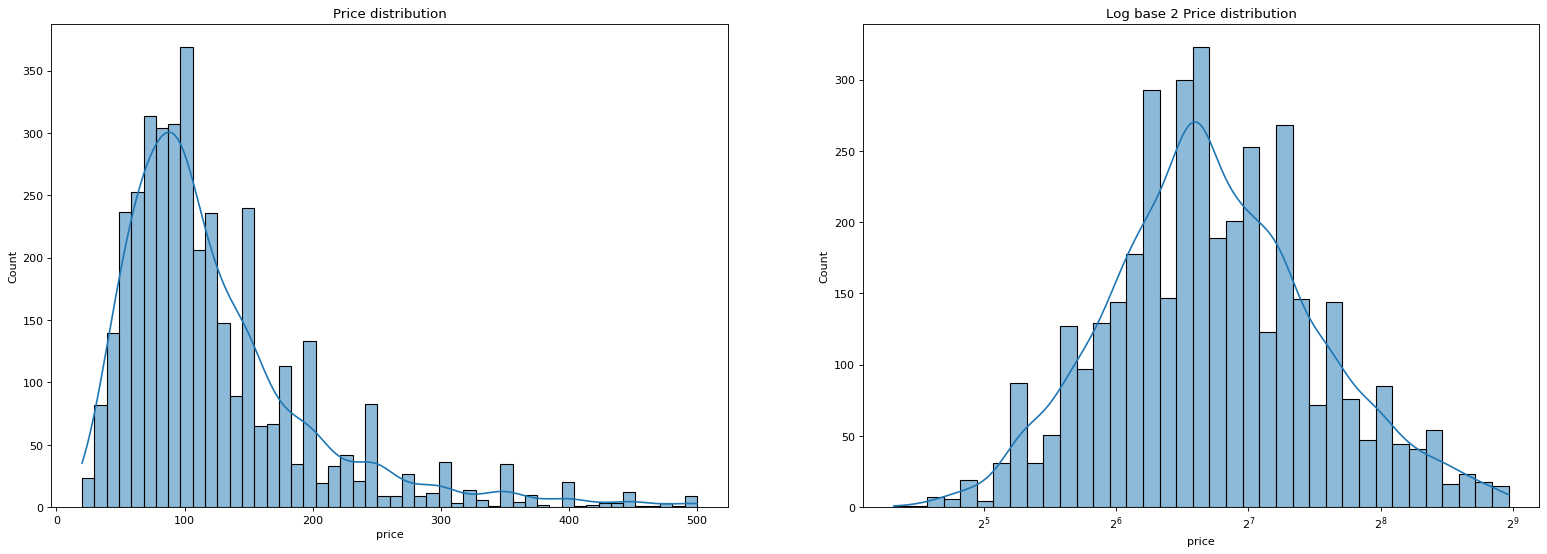

In [48]:
fig, axs = plt.subplots(1, 2, figsize=(24, 8), dpi=80)
axs[0].set_title('Price distribution')
axs[1].set_title('Log base 2 Price distribution')
sb.histplot(lt_new['price'], kde=True, ax=axs[0])
sb.histplot(lt_new['price'].astype(int), kde=True, log_scale=2, ax=axs[1])
plt.show()

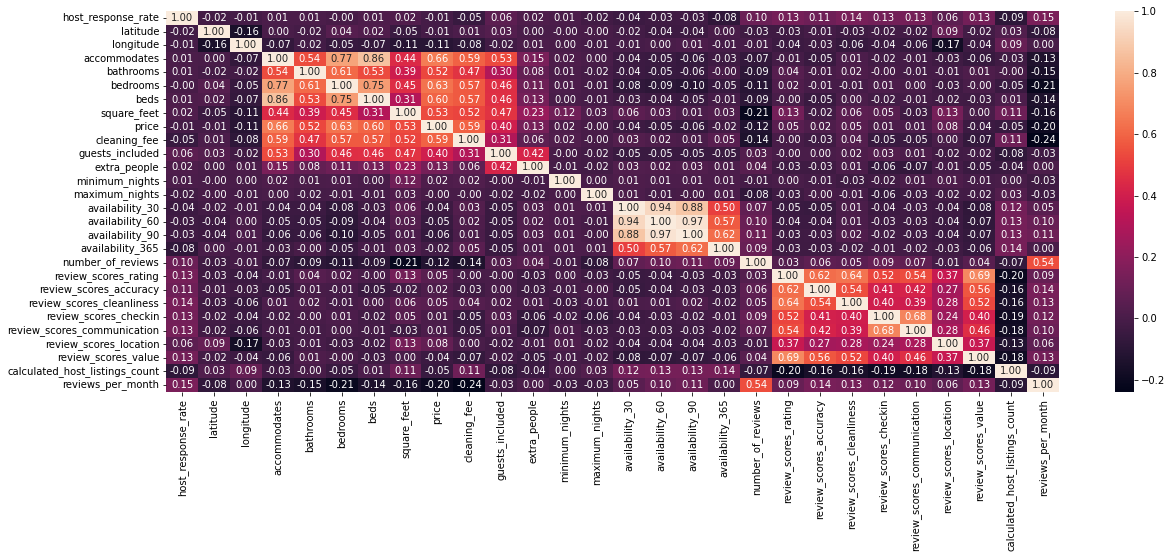

In [49]:
plt.figure(figsize = [20,7])

sb.heatmap(lt.corr(), annot=True, fmt=".2f");

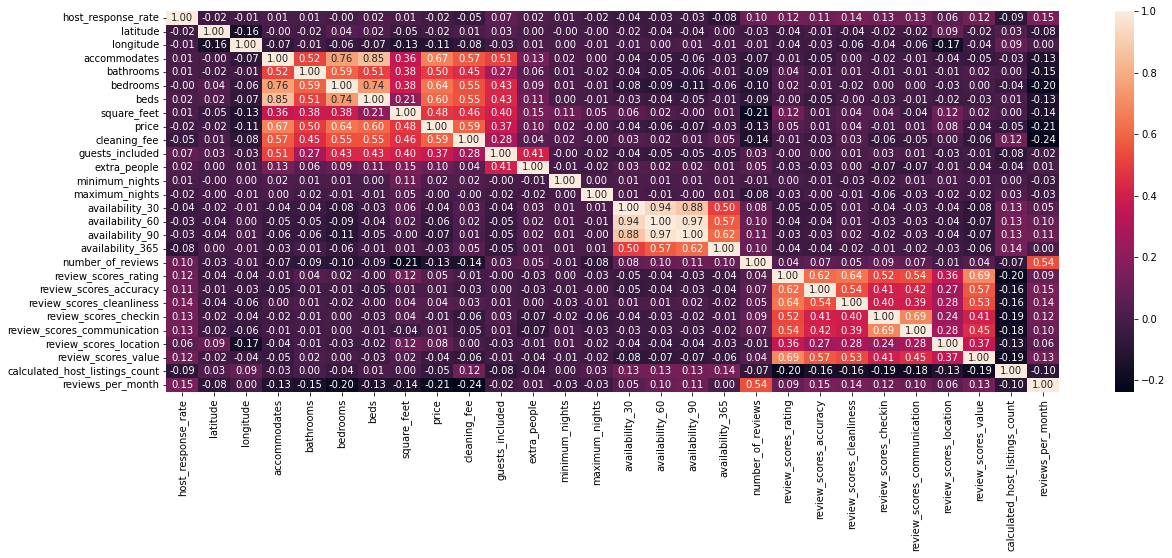

In [50]:
plt.figure(figsize = [20,7])

sb.heatmap(lt_new.corr(), annot=True, fmt=".2f");

In [51]:
lt.corr()['price'].sort_values()

reviews_per_month                -0.198528
number_of_reviews                -0.124562
longitude                        -0.105671
availability_90                  -0.061676
calculated_host_listings_count   -0.053780
availability_60                  -0.051975
review_scores_value              -0.040759
availability_30                  -0.039612
availability_365                 -0.018364
host_response_rate               -0.012873
latitude                         -0.012726
maximum_nights                   -0.003978
review_scores_checkin             0.006084
review_scores_communication       0.010865
review_scores_accuracy            0.015807
minimum_nights                    0.017755
review_scores_cleanliness         0.048191
review_scores_rating              0.048439
review_scores_location            0.077266
extra_people                      0.131303
guests_included                   0.399172
bathrooms                         0.523587
square_feet                       0.531752
cleaning_fe

In [52]:
lt_new.corr()['price'].sort_values()

reviews_per_month                -0.206019
number_of_reviews                -0.132330
longitude                        -0.112794
availability_90                  -0.072150
availability_60                  -0.059532
calculated_host_listings_count   -0.053835
availability_30                  -0.042407
review_scores_value              -0.039998
availability_365                 -0.026470
latitude                         -0.018125
host_response_rate               -0.015273
review_scores_checkin            -0.007287
maximum_nights                   -0.003670
review_scores_accuracy            0.007951
review_scores_communication       0.010293
minimum_nights                    0.019709
review_scores_cleanliness         0.037515
review_scores_rating              0.047308
review_scores_location            0.080111
extra_people                      0.102430
guests_included                   0.373311
square_feet                       0.482140
bathrooms                         0.497479
cleaning_fe

In [53]:
neighbour = lt_new.groupby(['neighbourhood'])['price'].mean().sort_values(ascending = False)[:10]
neighbour

neighbourhood
Fairmount Park               370.000000
Industrial District          245.000000
Alki                         196.652174
Portage Bay                  175.416667
Windermere                   174.700000
Pike Place Market            165.473684
Montlake                     165.166667
Fauntleroy                   164.100000
Central Business District    163.728395
Magnolia                     154.339623
Name: price, dtype: float64

In [54]:
lt_new["price"].describe()

count    3791.000000
mean      123.967555
std        75.951858
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max       500.000000
Name: price, dtype: float64

In [55]:
del lt_new["square_feet"]

In [56]:
set(lt_new.columns[lt_new.isnull().mean() > 0.5])

{'monthly_price', 'security_deposit'}

In [57]:
lt_new

,host_name,host_since,host_response_rate,host_is_superhost,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,zipcode,latitude,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,jurisdiction_names,cancellation_policy,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,Maija,2011-08-11,0.960000,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.636289,...,10.000000,10.000000,10.000000,9.000000,10.000000,WASHINGTON,moderate,f,2,4.070000
1,Andrea,2013-02-21,0.980000,t,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.639123,...,10.000000,10.000000,10.000000,10.000000,10.000000,WASHINGTON,strict,t,6,1.480000
3,Emily,2013-11-06,0.948868,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.638473,...,9.556398,9.786709,9.809599,9.608916,9.452245,WASHINGTON,flexible,f,1,2.078919
4,Emily,2011-11-29,1.000000,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.632918,...,9.000000,10.000000,10.000000,9.000000,9.000000,WASHINGTON,strict,f,1,0.890000
5,Andrew,2010-12-25,0.948868,f,Queen Anne,West Queen Anne,Queen Anne,Seattle,98119,47.630525,...,10.000000,10.000000,10.000000,10.000000,10.000000,WASHINGTON,strict,f,1,2.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,Bo,2015-04-13,0.990000,f,Fremont,Fremont,Other neighborhoods,Seattle,98107,47.664295,...,10.000000,4.000000,8.000000,10.000000,8.000000,WASHINGTON,strict,f,8,0.300000
3814,Glen,2015-10-14,1.000000,f,Portage Bay,Portage Bay,Capitol Hill,Seattle,98102,47.649552,...,10.000000,10.000000,10.000000,10.000000,10.000000,WASHINGTON,moderate,f,1,2.000000
3815,Virginia,2015-12-30,0.948868,f,Unknown,Rainier Beach,Rainier Valley,Seattle,98178,47.508453,...,9.556398,9.786709,9.809599,9.608916,9.452245,WASHINGTON,moderate,f,1,2.078919
3816,Karen,2015-01-03,1.000000,f,Unknown,Madison Park,Capitol Hill,Seattle,98112,47.632335,...,9.556398,9.786709,9.809599,9.608916,9.452245,WASHINGTON,moderate,f,1,2.078919


In [58]:
lt_new.select_dtypes(include=['object']).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3791 entries, 0 to 3817
Data columns (total 21 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   host_name                         3789 non-null   object
 1   host_since                        3789 non-null   object
 2   host_is_superhost                 3789 non-null   object
 3   neighbourhood                     3791 non-null   object
 4   neighbourhood_cleansed            3791 non-null   object
 5   neighbourhood_group_cleansed      3791 non-null   object
 6   city                              3791 non-null   object
 7   zipcode                           3784 non-null   object
 8   is_location_exact                 3791 non-null   object
 9   property_type                     3791 non-null   object
 10  room_type                         3791 non-null   object
 11  bed_type                          3791 non-null   object
 12  amenities           

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


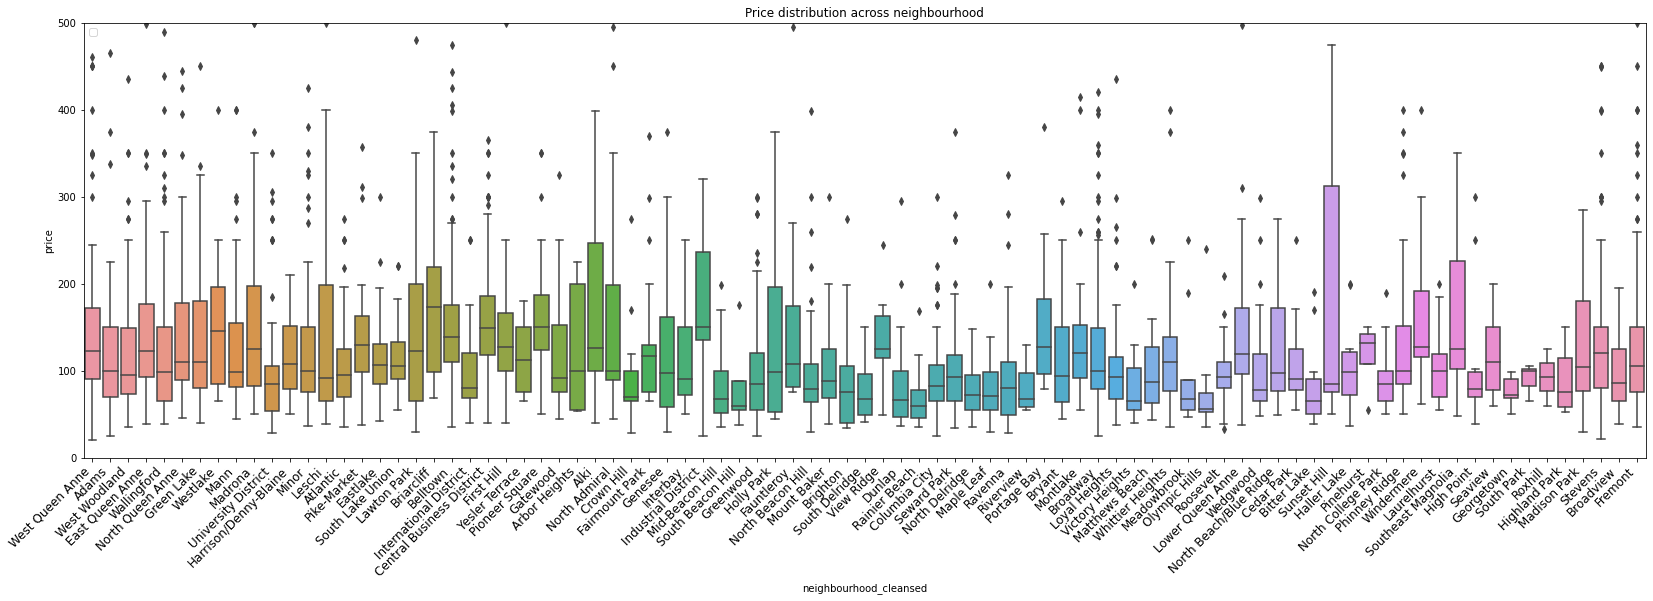

In [59]:
plt.figure(figsize=(28,8))
plt.title("Price distribution across neighbourhood")

sb.boxplot(data=lt_new, x='neighbourhood_cleansed', y='price')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)

plt.ylim([0,500])
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


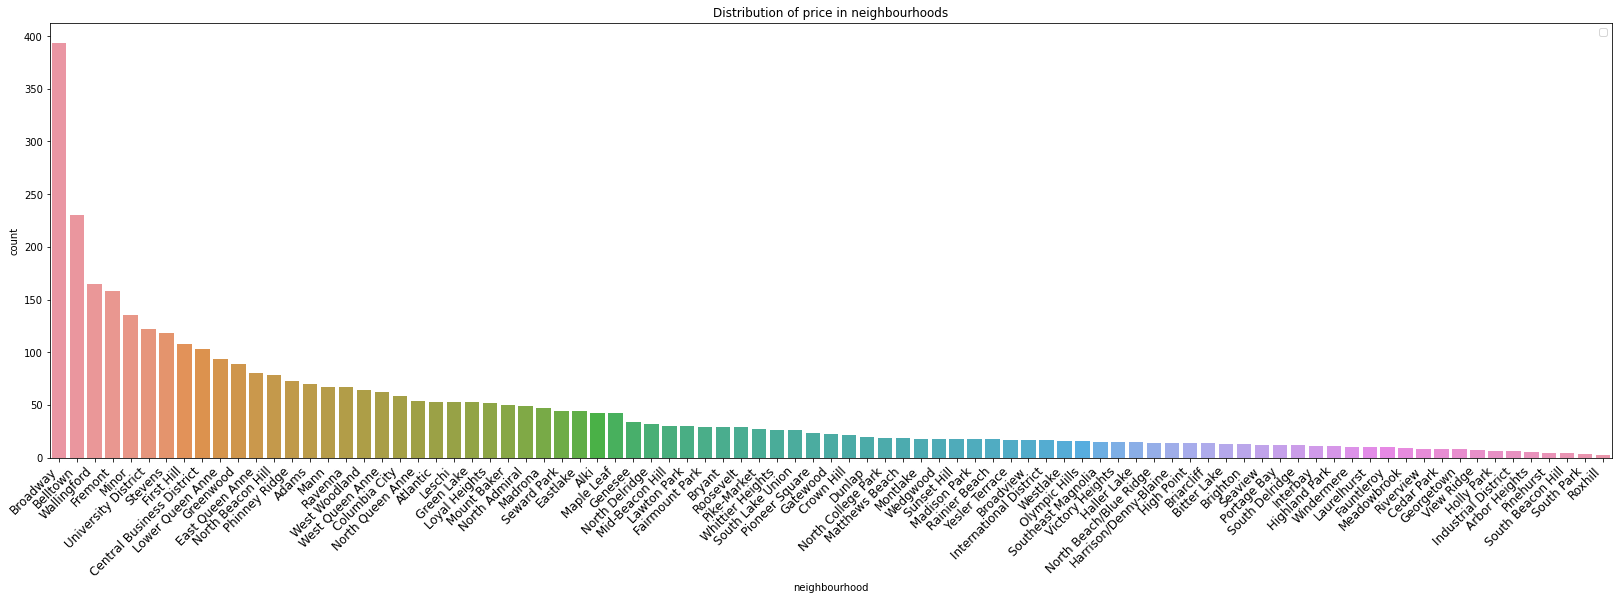

In [60]:
_neighb = lt_new['neighbourhood_cleansed'].value_counts().sort_values(ascending=False).reset_index(name='count').rename(columns = {'index':'neighbourhood'})
plt.figure(figsize=(28,8))
plt.title("Distribution of price in neighbourhoods")
sb.barplot(data=_neighb, x='neighbourhood', y='count')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.legend()
plt.show()

In [61]:
_num_cols = ['price', 'latitude','longitude', 'accommodates', 'bedrooms', 'bathrooms', 'beds', 
             'cleaning_fee', 'guests_included', 'availability_30', 'availability_60', 'availability_90', 
             'availability_365', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 
             'review_scores_location', 'review_scores_value', 'calculated_host_listings_count']

_numeric = lt_new.select_dtypes(include=['int64', 'float64'])[_num_cols]
print(_numeric.info())


_cat_cols = ['host_is_superhost', 'room_type', 'bed_type', 'neighbourhood_cleansed',
             'cancellation_policy', 'property_type', 'require_guest_phone_verification']

_numeric[_cat_cols] = lt_new[_cat_cols]

_num_copy = _numeric.copy()

_num_copy = _num_copy.replace({ "host_is_superhost": {"t": 1, "f": 2}, "instant_bookable": {"t": 1, "f": 2}, 
                                "host_identity_verified": {"t": 1, "f": 2}, "require_guest_profile_picture": {"t": 1, "f": 2},
                                "room_type": {"Entire home/apt": 1, "Private room": 2, "Shared room": 3}, "host_has_profile_pic": {"t": 1, "f": 2},
                               "bed_type": {"Real Bed": 1, "Futon": 2, "Airbed": 3, "Pull-out Sofa": 4, "Couch": 5},
                               "require_guest_phone_verification": {"t": 1, "f": 2},
                               "cancellation_policy": {"moderate": 1, "flexible": 2, "strict": 3, "super_strict_30": 4}})

_dummies = pd.get_dummies(_num_copy)
print(_dummies.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3791 entries, 0 to 3817
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           3791 non-null   float64
 1   latitude                        3791 non-null   float64
 2   longitude                       3791 non-null   float64
 3   accommodates                    3791 non-null   int64  
 4   bedrooms                        3791 non-null   float64
 5   bathrooms                       3791 non-null   float64
 6   beds                            3791 non-null   float64
 7   cleaning_fee                    3791 non-null   float64
 8   guests_included                 3791 non-null   int64  
 9   availability_30                 3791 non-null   int64  
 10  availability_60                 3791 non-null   int64  
 11  availability_90                 3791 non-null   int64  
 12  availability_365                37

In [62]:
_dummies

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,availability_30,...,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Unknown,property_type_Yurt
0,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,61.710904,2,14,...,0,0,0,0,0,0,0,0,0,0
1,150.0,47.639123,-122.365666,4,1.0,1.0,1.0,40.000000,1,13,...,0,0,0,0,0,0,0,0,0,0
3,100.0,47.638473,-122.369279,3,0.0,1.0,2.0,61.710904,1,0,...,0,0,0,0,0,0,0,0,0,0
4,450.0,47.632918,-122.372471,6,3.0,2.0,3.0,125.000000,6,30,...,0,0,1,0,0,0,0,0,0,0
5,120.0,47.630525,-122.366174,2,1.0,1.0,1.0,40.000000,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,47.664295,-122.359170,6,3.0,2.0,3.0,230.000000,1,18,...,0,0,1,0,0,0,0,0,0,0
3814,79.0,47.649552,-122.318309,4,1.0,1.0,2.0,50.000000,3,6,...,0,0,0,0,0,0,0,0,0,0
3815,93.0,47.508453,-122.240607,2,1.0,1.0,1.0,35.000000,2,29,...,0,0,1,0,0,0,0,0,0,0
3816,99.0,47.632335,-122.275530,2,0.0,1.0,1.0,45.000000,1,30,...,1,0,0,0,0,0,0,0,0,0


In [63]:
new_data = _dummies.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [64]:
new_data

,price,latitude,longitude,accommodates,bedrooms,bathrooms,beds,cleaning_fee,guests_included,availability_30,...,property_type_Condominium,property_type_Dorm,property_type_House,property_type_Loft,property_type_Other,property_type_Tent,property_type_Townhouse,property_type_Treehouse,property_type_Unknown,property_type_Yurt
0,85.0,47.636289,-122.371025,4,1.0,1.0,1.0,61.710904,2,14,...,0,0,0,0,0,0,0,0,0,0
1,150.0,47.639123,-122.365666,4,1.0,1.0,1.0,40.000000,1,13,...,0,0,0,0,0,0,0,0,0,0
3,100.0,47.638473,-122.369279,3,0.0,1.0,2.0,61.710904,1,0,...,0,0,0,0,0,0,0,0,0,0
4,450.0,47.632918,-122.372471,6,3.0,2.0,3.0,125.000000,6,30,...,0,0,1,0,0,0,0,0,0,0
5,120.0,47.630525,-122.366174,2,1.0,1.0,1.0,40.000000,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,359.0,47.664295,-122.359170,6,3.0,2.0,3.0,230.000000,1,18,...,0,0,1,0,0,0,0,0,0,0
3814,79.0,47.649552,-122.318309,4,1.0,1.0,2.0,50.000000,3,6,...,0,0,0,0,0,0,0,0,0,0
3815,93.0,47.508453,-122.240607,2,1.0,1.0,1.0,35.000000,2,29,...,0,0,1,0,0,0,0,0,0,0
3816,99.0,47.632335,-122.275530,2,0.0,1.0,1.0,45.000000,1,30,...,1,0,0,0,0,0,0,0,0,0


In [65]:
y = new_data['price']
X = new_data.drop('price',  axis =1 )

In [66]:
y

0        85.0
1       150.0
3       100.0
4       450.0
5       120.0
        ...  
3813    359.0
3814     79.0
3815     93.0
3816     99.0
3817     87.0
Name: price, Length: 3789, dtype: float64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [68]:
reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.6021357276241907

In [117]:
print("Liner Regression R-squared: {}".format(reg.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression R-squared: 0.6021357276241907
Liner Regression RMSE: 48.32976866106988
Liner Regression MAE: 32.647268799174746


In [76]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(y_pred, y_test)
lin_rmse = np.sqrt(lin_mse)
print("Liner Regression RMSE: {}".format(lin_rmse))

Liner Regression RMSE: 48.32976866106988


In [77]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_pred, y_test)
print("Liner Regression MAE: {}".format(lin_mae))

Liner Regression MAE: 32.647268799174746


In [78]:
importance = reg.coef_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} : {}'.format(X_train.columns[index], (importance[index] )))

property_type_Dorm : -120.09129433268879
longitude : -116.88838140636292
neighbourhood_cleansed_Pinehurst : -53.2080941214962
neighbourhood_cleansed_Bitter Lake : -52.28028116907544
neighbourhood_cleansed_South Park : -43.27863992609034
neighbourhood_cleansed_South Delridge : -42.45576310079928
neighbourhood_cleansed_Crown Hill : -37.56574138308526
room_type : -33.05998895025074
neighbourhood_cleansed_Broadview : -29.369521117975605
neighbourhood_cleansed_North Delridge : -27.029589275326927
property_type_Tent : -24.40414098318703
neighbourhood_cleansed_Haller Lake : -24.196605258851395
neighbourhood_cleansed_Riverview : -22.019857406688597
neighbourhood_cleansed_North College Park : -21.39743866176979
neighbourhood_cleansed_Greenwood : -21.287822529729816
neighbourhood_cleansed_Meadowbrook : -21.168819752404087
neighbourhood_cleansed_Cedar Park : -20.690391138131734
neighbourhood_cleansed_Roxhill : -20.62326323407589
neighbourhood_cleansed_Mid-Beacon Hill : -19.45584845687157
neighbou

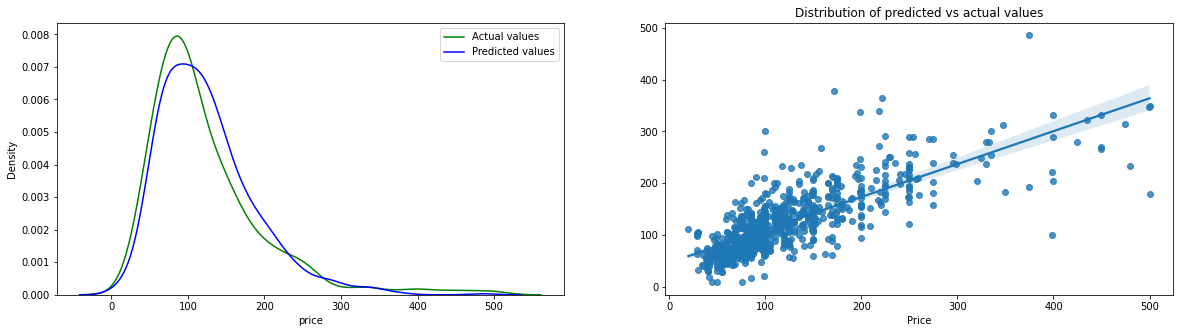

In [69]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

In [70]:
rf = RandomForestRegressor(n_estimators=76, random_state=47)

In [71]:
rf.fit(X_train, y_train)

y_pred2 = rf.predict(X_test)

r2_score(y_test, y_pred2)

0.6452224796442532

In [118]:
print("Random Forest R-squared: {}".format(rf.score(X_test, y_test)))

from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_pred2, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

from sklearn.metrics import mean_absolute_error

forest_mae = mean_absolute_error(y_pred2, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

Random Forest R-squared: 0.6452224796442532
Random Forest Regression RMSE: 45.63786216403595
Random Forest Regression MAE: 29.57991945563116


In [81]:
from sklearn.metrics import mean_squared_error

forest_mse = mean_squared_error(y_pred2, y_test)
forest_rmse = np.sqrt(forest_mse)
print("Random Forest Regression RMSE: {}".format(forest_rmse))

Random Forest Regression RMSE: 45.63786216403595


In [82]:
from sklearn.metrics import mean_absolute_error

forest_mae = mean_absolute_error(y_pred2, y_test)
print("Random Forest Regression MAE: {}".format(forest_mae))

Random Forest Regression MAE: 29.57991945563116


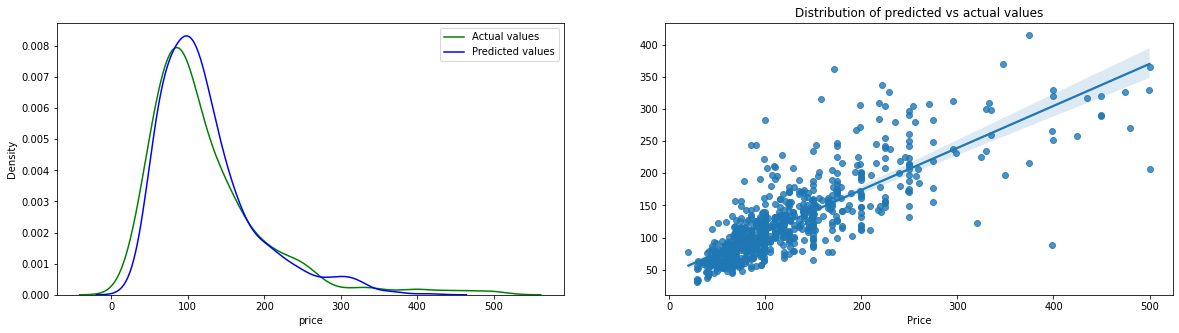

In [72]:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_pred2, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_pred2)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');